In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding what the columns mean
Column names:

    ID = unique id number
    title = song’s title
    artist = song’s artist
    top genre = the genre of the track
    year = song’s year in the billboard
    bpm = beats per minute (tempo)
    nrgy = energy, the higher the value the more energetic the song
    dnce = danceability, the higher the value the easier it is to dance to
    db = loudness, the higher the value the louder the song
    live = the higher the value the more likely the song is a live recording
    val = valence, the higher the value the more positive the mood
    dur = duration of the song
    acous = acousticness, the higher the value the more acoustic the song is
    spch = speechiness, the higher the value the more spoken word the song contains
    pop = popularity, the higher the value the more popular the song is


## reading each of the csv files

In [3]:
df_2010= pd.read_csv('2010.csv')
df_2011=pd.read_csv('2011.csv')
df_2012=pd.read_csv('2012.csv')
df_2013= pd.read_csv('2013.csv')
df_2014= pd.read_csv('2014.csv')
df_2015=pd.read_csv('2015.csv')
df_2016= pd.read_csv('2016.csv')
df_2017= pd.read_csv('2017.csv')
df_2018= pd.read_csv('2018.csv')
df_2019= pd.read_csv('2019.csv')


In [4]:
df_2010.shape



(51, 15)

In [5]:
df_2011.shape

(53, 15)

In [6]:
df_2012.shape

(35, 15)

In [7]:
df_2013.shape

(71, 15)

In [8]:
df_2014.shape

(58, 15)

In [9]:
df_2015.shape

(95, 15)

In [10]:
df_2016.shape

(80, 15)

In [11]:
df_2017.shape

(65, 15)

In [12]:
df_2018.shape

(64, 15)

In [13]:
df_2019.shape

(31, 15)

In [14]:
# combine all datasets
all_top_songs=pd.concat([df_2010, df_2011, df_2012, df_2013,df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])

In [15]:
all_top_songs.shape



(603, 15)

In [16]:
# cleaning the datasets
 ## Clean the dataset to make sure the following columns are either integer or floats and not objects:
"""
    id
    year
    bpm
    nrgy
    dnce
    db
    live
    val
    dur
    acous
    spch
    pop

"""
pd.set_option('display.max_columns',15)
all_top_songs


# saving to a csv
all_top_songs.to_csv('top_spotify_songs.csv', index=False)

In [17]:
#checking current data types
all_top_songs.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [18]:



all_top_songs.infer_objects().dtypes


Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [19]:
# transforming this columsn into either integers or floats


"""
 id
    year
    bpm
    nrgy
    dnce
    db
    live
    val
    dur
    acous
    spch
    pop

    """

'\n id\n    year\n    bpm\n    nrgy\n    dnce\n    db\n    live\n    val\n    dur\n    acous\n    spch\n    pop\n\n    '

In [20]:
all_top_songs.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

Questions

1. What is the most popular song in the dataset?   
   

In [21]:
# select the  title and pop  columns
popularity=all_top_songs[['title','pop', 'artist']]
#find the maximum value for the  pop column
max_pop=all_top_songs['pop'].max()

top_song=popularity.loc[(popularity['pop']==max_pop)]
for element in top_song.iterrows():
    title=element[1]['title']
    popular= element[1]['pop']
    artist=element[1]['artist']
    
print(f"the most popular song in the database is {title}  by {artist} with a popularity value of {popular} ")





the most popular song in the database is Memories  by Maroon 5 with a popularity value of 99 


2. What artist has the most songs in the dataset?

In [22]:

#select the artist and title columns from the database
artist_and_song=all_top_songs[['artist','title']]

#let's group them by artists
grouped_artists=artist_and_song.groupby('artist')
#let's count
count_all_artists=grouped_artists.count()
sorted_artists=count_all_artists.sort_values('title', ascending=False)
max_artists=sorted_artists.max()
top_artist=sorted_artists.loc[sorted_artists.title==max_artists.title]
for element in top_artist.iterrows():
    top_name=element[0]
    top_total=element[1]['title']


print(f'The artist who has the most songs in the dataset is {top_name} with {top_total} songs in the dataset')
#top_artist

The artist who has the most songs in the dataset is Katy Perry with 17 songs in the dataset


3. What is the most popular genre of music in the dataset?

In [34]:
all_genres=all_top_songs[['top genre', 'pop']]
grouped_genres=all_genres.groupby('top genre')
average_pop=grouped_genres.mean()

sorted_average=average_pop.sort_values('pop', ascending=False)
max_sorted_average=sorted_average['pop'].max()
max_sorted_average
top_genre= sorted_average.loc[(sorted_average['pop']==max_sorted_average)]
for element in top_genre.iterrows():
    most_pop_genre=element[0]
    top_genre_pop=element[1].iloc[0]

print(f'The most popular genre of music in the dataset is {most_pop_genre} with an average {top_genre_pop} popularity') 


    






The most popular genre of music in the dataset is escape room with an average 90.0 popularity


4. Are there any songs in the dataset more than once?
   

In [24]:
dupes=all_top_songs[all_top_songs.duplicated(('title', 'artist'))]
titles=dupes['title']
print('Yes, there are songs in the dataset mroe than once. which are the following:')
for element in titles:
    print()
    
    print(element)




Yes, there are songs in the dataset mroe than once. which are the following:

Just the Way You Are

Marry You

Written in the Stars (feat. Eric Turner)

Castle Walls (feat. Christina Aguilera)

We Are Never Ever Getting Back Together

A Little Party Never Killed Nobody (All We Got)

Sugar

The Hills

Love Yourself

Stitches

Company

Runnin' (Lose It All)

Here

All I Ask

First Time

Kissing Strangers


5. Is there a relationship between popularity and danceability?

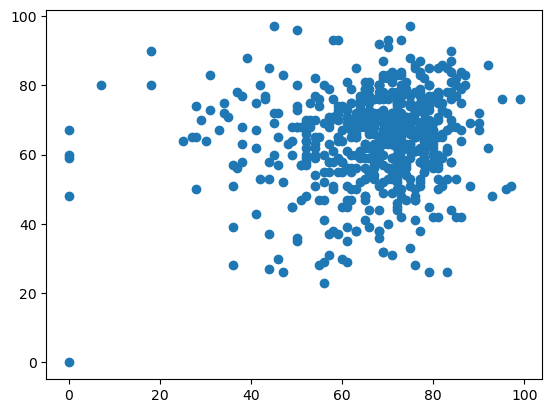

In [25]:
popu=all_top_songs['pop']
dance=all_top_songs['dnce']
plt.scatter(popu, dance)



plt.show()


6. Does having a higher bpm lead to having a higher energy score?

7. Which genre has the highest energy score?